In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import joblib
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
dff=pd.read_csv("./TopFeatures.csv")

In [3]:
feat=dff.to_numpy()
feat=feat.reshape(-1)

In [4]:
def img_reshape(img):
    img = Image.open(('./testingFrames/'+img).replace(".csv",".bmp")).convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img

In [5]:
def load_images(dirName):
    images = os.listdir(dirName)
    img_arr = []
    for image in images:
        img_arr.append(img_reshape(image))

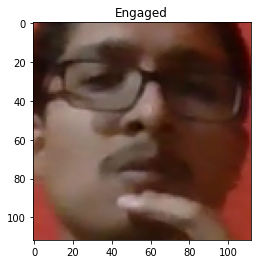

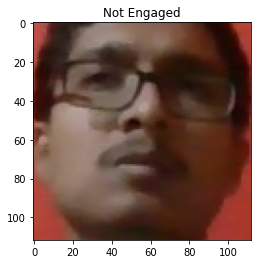

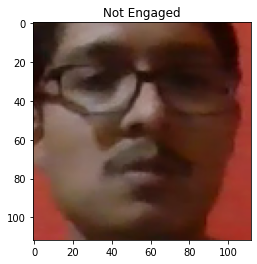

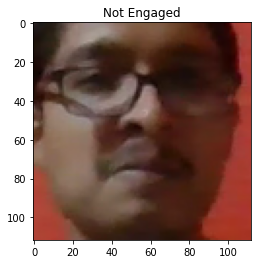

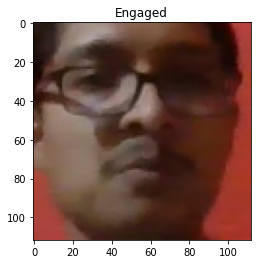

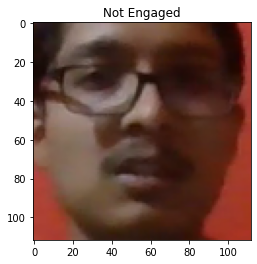

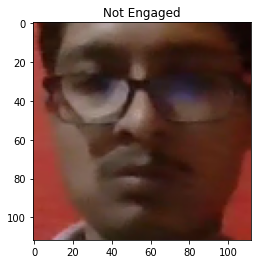

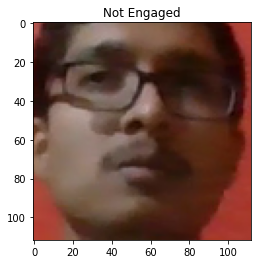

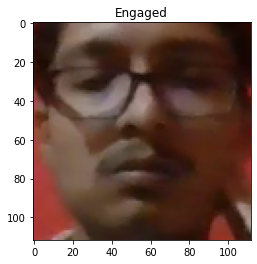

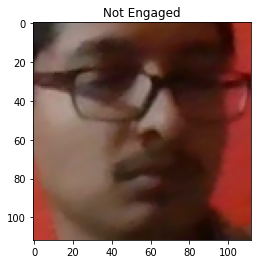

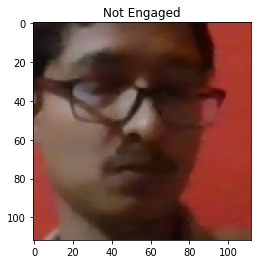

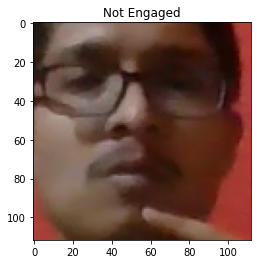

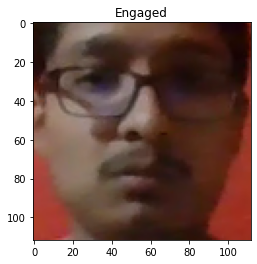

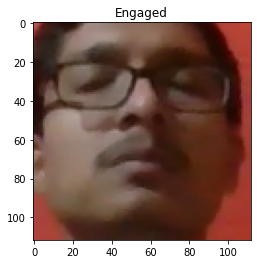

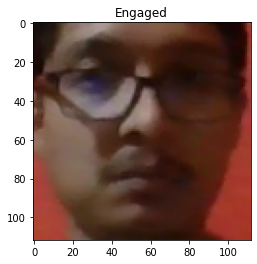

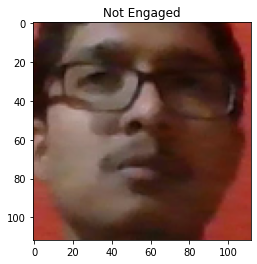

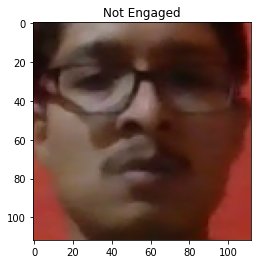

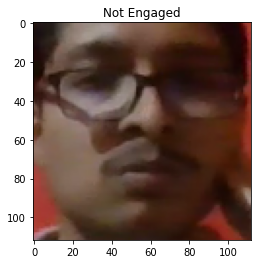

In [6]:
pathl = r'./testingFrames' # use your path
pathi='./testingFrames'
all_files = glob.glob(pathl + "/*.csv")

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df=df.drop(['face',' confidence'],axis=1)
    x_train=df
    x_train=x_train[feat]
    fileNameCsv=filename.replace("./testingFrames/","")
    fileNameImg=fileNameCsv.replace(".csv",".bmp")
    mj = joblib.load('./models/model_joblib_decision_tree')
    y_pred = mj.predict(x_train)
    
    title_image=""
    if(y_pred[0]==0):
        title_image="Not Engaged"
    elif(y_pred[0]==1):
        title_image="Engaged"
    
    image = mpimg.imread(filename.replace(".csv",".bmp"))
    
    plt.figure()
    plt.title(title_image)
    plt.imshow(image)
    